# SANTANDER DATA MASTER - CIENTISTA DE DADOS

### Questão c) Três grupos naturais com maior lucro

Descrição: Todo conjunto de dados é passível de ser dividido em grupos coesos, conhecidos como agrupamentos naturais. A terceira tarefa é encontrar os três grupos naturais que possuem os maiores lucros esperados por cliente (usando os mesmos valores da primeira questão).

In [2]:
#Imports

#Manipulação dos Dados
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


In [3]:
df_train = pd.read_pickle('./train_1.pickle')
df_test = pd.read_pickle('./test_1.pickle')

In [4]:
df_train.shape,df_test.shape

((76020, 142), (75818, 141))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['TARGET','ID'], axis = 1), df_train.TARGET, stratify = df_train.TARGET, train_size = 0.80 ,random_state = 42)

Para realizar essa questão, vamos utilizar o método KMeans. Para que o resultado seja mais assertivo, o StandardScaler será essencial, pois ele padroniza os recursos removendo a média e dimensionando para a variação da unidade. Como o algoritmo é baseado no cálculo da distância e, portanto, os dados devem ser transformados em uma escala padronizada.

In [6]:
X_train_scaler = StandardScaler().fit_transform(X_train)

Para usar o KMeans com maestria, identificar o K ideal é primordial para chegarmos em uma conclusão factível. K seria o número de cluster naturais da base.

In [7]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,50))

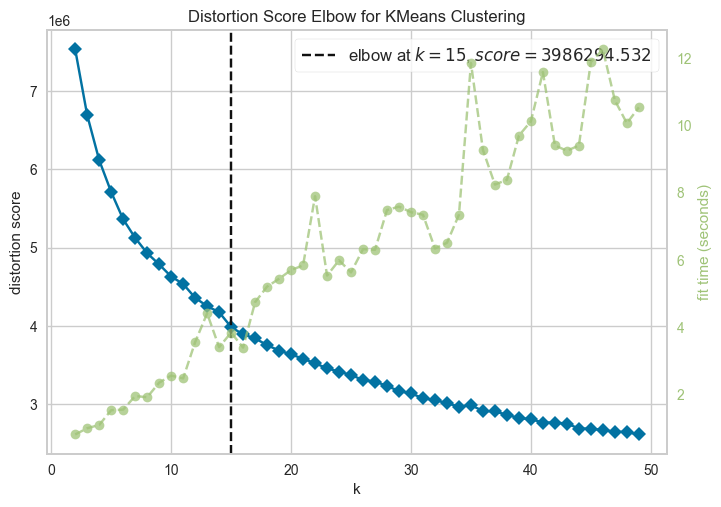

In [8]:
visualizer.fit(X_train_scaler)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

Identificamos que o K ideal é 15.

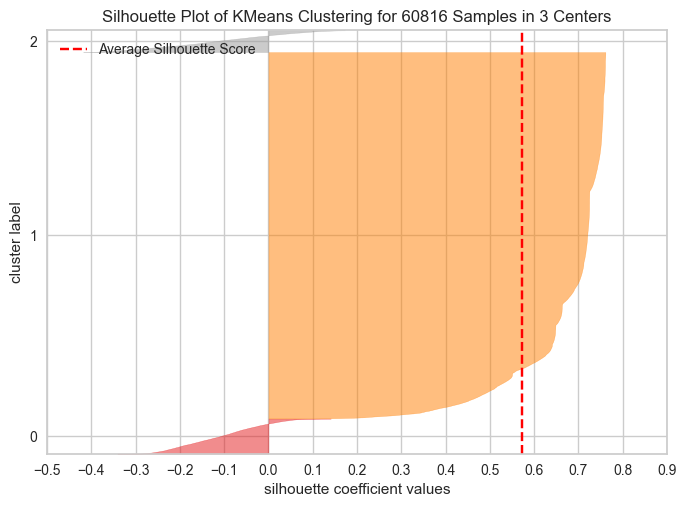

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 60816 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
model_3clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_3clust)
sil_visualizer.fit(X_train_scaler)    
sil_visualizer.show()

In [9]:
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train_scaler)
    distortions.append(kmeanModel.inertia_)

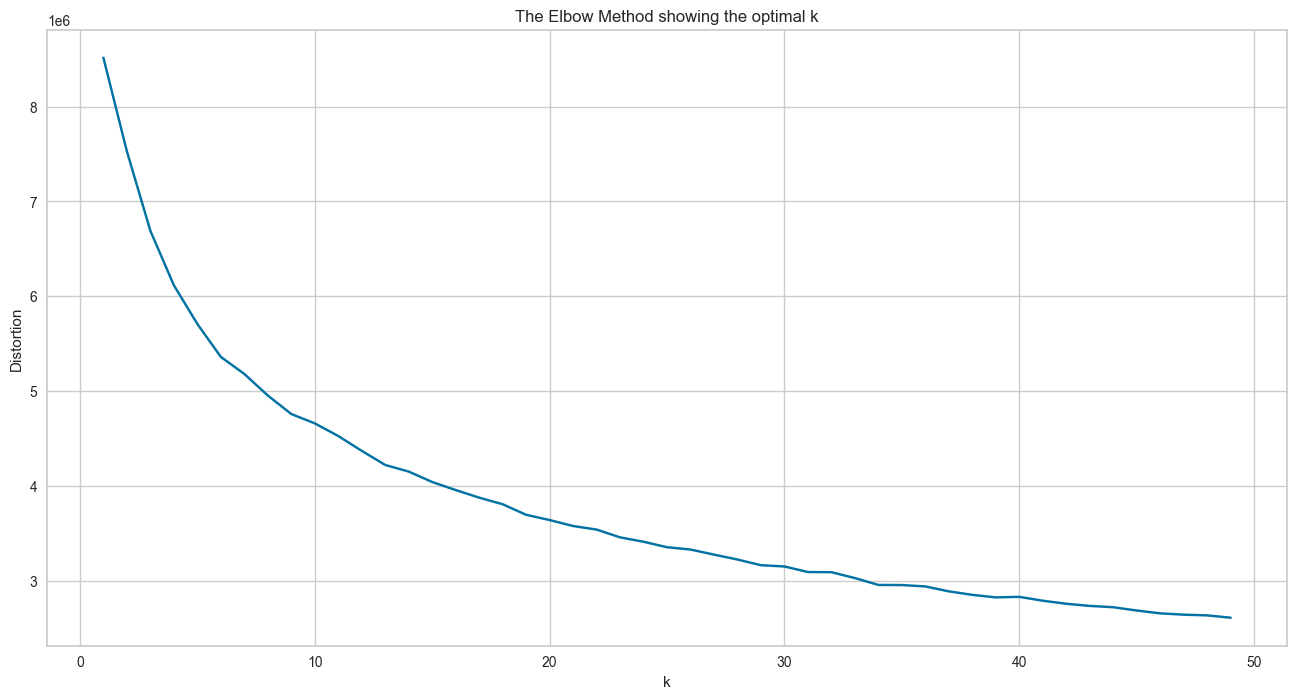

In [10]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Uma vez definido que deve haver 16 clusters, os 3 grupos que geram maior lucro por cliente são aqueles que possuem a maior proporção de clientes insatisfeitos para que o programa de retenção seja aplicado a um maior número de clientes verdadeiramente insatisfeitos e gere lucro.

In [ ]:
from sklearn.metrics import silhouette_score

coefficients = []

for i in range(6, 50):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_train_scaler)
    score = silhouette_score(X_train_scaler, kmeans.labels_)
    coefficients.append(score)
    
    print("For K = {}, silhouette score is {})".format(i, score))

For K = 6, silhouette score is 0.2680750088128979)
For K = 7, silhouette score is 0.28639939969411904)
For K = 8, silhouette score is 0.3115349079130585)
For K = 9, silhouette score is 0.3228782289964954)
For K = 10, silhouette score is 0.3271828869498845)
For K = 11, silhouette score is 0.33540863729955506)
For K = 12, silhouette score is 0.34078567858253894)
For K = 13, silhouette score is 0.34301196428958686)
For K = 14, silhouette score is 0.3424218011198651)
For K = 15, silhouette score is 0.35778603375470164)
For K = 16, silhouette score is 0.36086191732153333)
For K = 17, silhouette score is 0.3667353836985186)
For K = 18, silhouette score is 0.3612225209002535)
For K = 19, silhouette score is 0.36376058345582524)
For K = 20, silhouette score is 0.38086911643133287)
For K = 21, silhouette score is 0.3640600945169779)
For K = 22, silhouette score is 0.4024955659611518)
For K = 23, silhouette score is 0.3639020643322142)
For K = 24, silhouette score is 0.38255007835777116)
For K =

In [10]:
kmeans = KMeans(n_clusters = 16).fit(X_train_scaler)
kmeans.labels_

array([15,  4,  0, ..., 10, 15,  0])

In [11]:
result_train = pd.DataFrame({'target': y_train, 'labels': kmeans.labels_})
result_train.head()

,target,labels
56035,0,15
15449,0,4
68443,0,0
50258,0,15
4858,0,0


In [12]:
unsatisfied_dist = result_train[result_train['target'] == 1].labels.value_counts().sort_index()

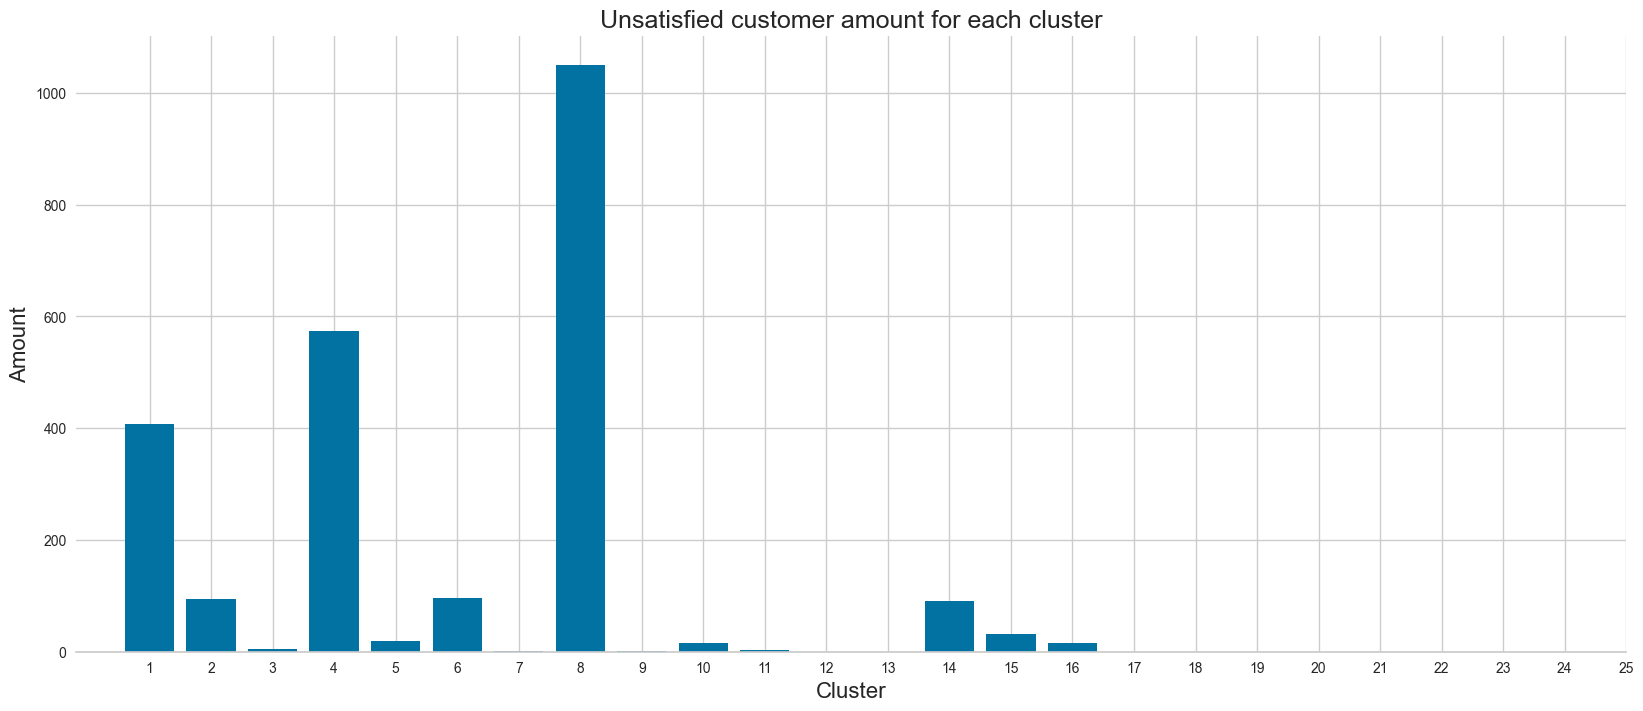

In [29]:
fig, ax = plt.subplots(figsize = (20, 8))
plt.bar(unsatisfied_dist.index + 1, unsatisfied_dist.values);
plt.title('Unsatisfied customer amount for each cluster', fontsize = 18);
plt.xlabel('Cluster', fontsize = 16);
plt.ylabel('Amount', fontsize = 16)
plt.xticks(range(1, 26, 1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

Agrupamento 1, 4 e 8

In [13]:
scaled_features = StandardScaler().fit_transform(X_test)
result_test = pd.DataFrame({'target': y_test, 'labels': kmeans.predict(scaled_features)})
result_test.head()

,target,labels
63089,0,9
27056,0,0
5923,0,0
4865,0,0
6344,0,15


In [14]:
unsatisfied_dist_test = result_test[result_test['target'] == 1].labels.value_counts().sort_index()

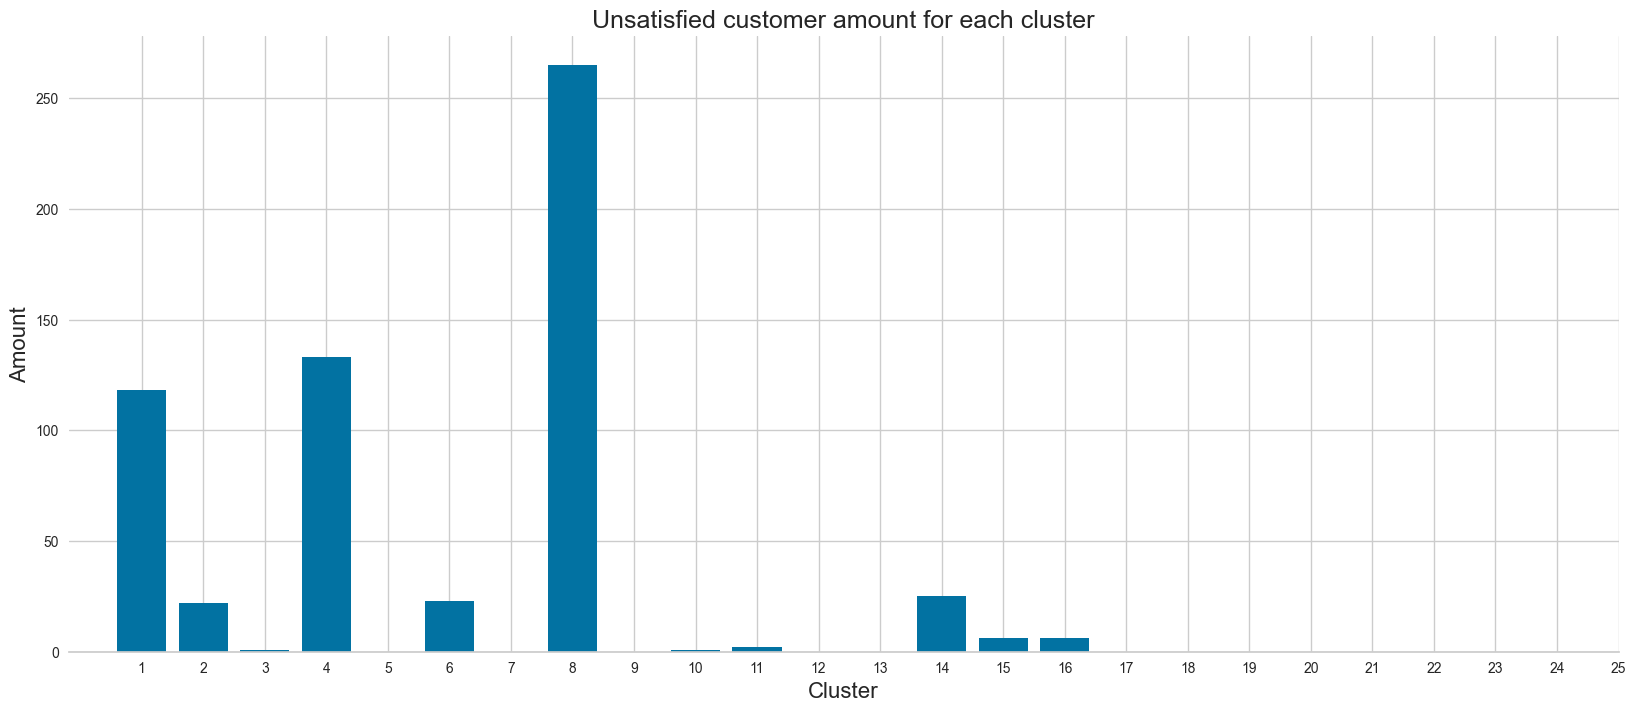

In [34]:
fig, ax = plt.subplots(figsize = (20, 8))
plt.bar(unsatisfied_dist_test.index + 1, unsatisfied_dist_test.values);
plt.title('Unsatisfied customer amount for each cluster', fontsize = 18);
plt.xlabel('Cluster', fontsize = 16);
plt.ylabel('Amount', fontsize = 16)
plt.xticks(range(1, 26, 1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

Como esperado, os clusters 1, 4 e 8 possuem a maior parte de clientes insatisfeitos. É uma evidência clara de que nosso modelo funciona bem para novas instâncias!

In [17]:
result_test[result_test['labels'] == 8]

,target,labels
52270,0,8
36997,0,8
19467,0,8
23399,0,8
54465,0,8
...,...,...
15822,0,8
55746,0,8
23980,0,8
48994,0,8
